In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
# Cargar el archivo CSV
dataAlquiler = pd.read_csv('C:/Users/Diego/OneDrive/Escritorio/DatosEvaluacion/comprar_alquilar.csv')

In [26]:
# Mostrar las primeras filas de los datos para explorar su estructura
print(dataAlquiler.head())

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1  


In [27]:
# Separar las características de la variable objetivo
X_alquiler = dataAlquiler.drop('comprar', axis=1)
y_alquiler = dataAlquiler['comprar']

In [28]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled_alquiler = scaler.fit_transform(X_alquiler)

In [29]:
# Crear una instancia de PCA y ajustarla a los datos normalizados
pca = PCA()
X_pca_alquiler = pca.fit_transform(X_scaled_alquiler)

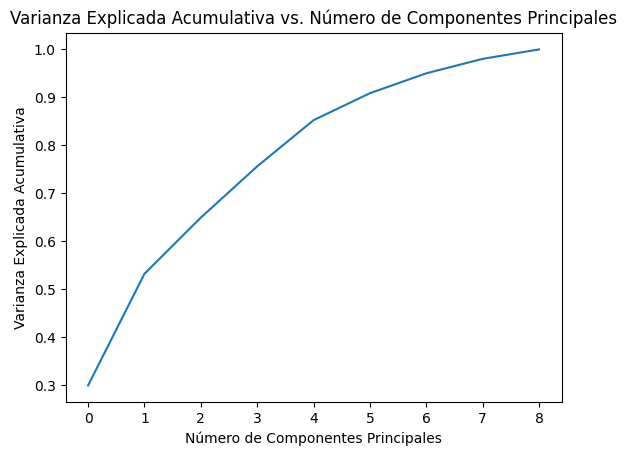

In [30]:
# Graficar la varianza explicada acumulativa
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance_ratio)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa vs. Número de Componentes Principales')
plt.show()

In [31]:
# Supongamos que min_variance_ratio es el porcentaje mínimo de varianza que deseas retener
min_variance_ratio = 0.95

In [32]:
# Encontrar el número mínimo de componentes para retener ese porcentaje de varianza
num_components = np.argmax(explained_variance_ratio >= min_variance_ratio) + 1


In [33]:
# Aplicar la transformación PCA con el número mínimo de componentes
pca = PCA(n_components=num_components)
X_reduced = pca.fit_transform(X_scaled_alquiler)

In [34]:
# Mostrar el número de componentes seleccionados
print(f"Número de componentes principales seleccionados: {num_components}")

Número de componentes principales seleccionados: 7


In [35]:
# Mostrar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, variance_ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i + 1}: {variance_ratio:.4f}")

Varianza explicada por cada componente principal:
Componente 1: 0.2991
Componente 2: 0.2329
Componente 3: 0.1171
Componente 4: 0.1069
Componente 5: 0.0964
Componente 6: 0.0563
Componente 7: 0.0415


In [36]:
# Mostrar la varianza explicada acumulativa
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)
print("Varianza explicada acumulativa por número de componentes:")
for i, variance_cumulative in enumerate(explained_variance_cumulative):
    print(f"{i + 1} componentes: {variance_cumulative:.4f}")

Varianza explicada acumulativa por número de componentes:
1 componentes: 0.2991
2 componentes: 0.5321
3 componentes: 0.6492
4 componentes: 0.7561
5 componentes: 0.8524
6 componentes: 0.9087
7 componentes: 0.9502


In [37]:
# Eliminar las dos columnas adicionales de X_pca_alquiler y crear un nuevo DataFrame
X_pca_alquiler = X_pca_alquiler[:, :7]

# Crear el DataFrame X_pca_alquiler con las columnas correctas
X_pca_alquiler = pd.DataFrame(
    X_pca_alquiler,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
)

X_pca_alquiler.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.321915,-0.222950,-1.599863,-0.885014,0.646617,-0.700208,-0.318031
1,-1.147878,1.716967,-0.395722,-0.447960,-0.687805,-0.231969,-1.542487
2,-0.090369,1.836066,-1.359382,0.337505,0.742387,0.593030,1.540495
3,-3.455898,-0.078279,0.202382,-1.573584,-0.068551,-0.051945,-0.909409
4,-0.916933,-1.184676,-0.190036,0.117804,-0.147753,-0.619750,0.450419


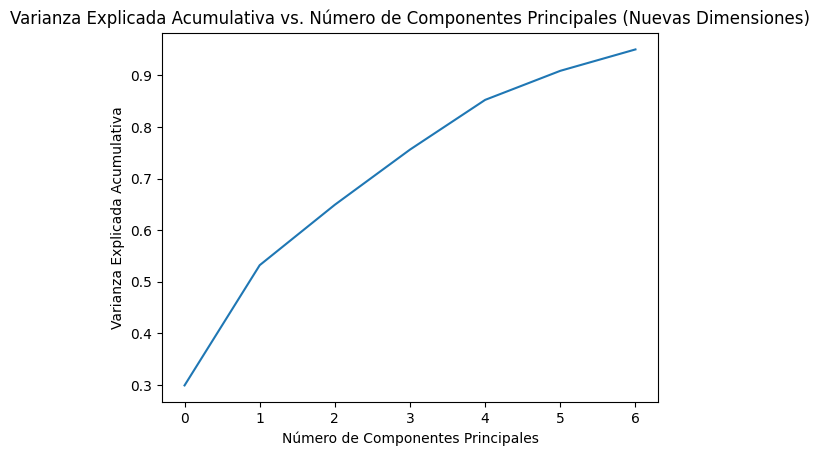

In [23]:
#Graficamos la varianza en sus nuevas dimensiones
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance_ratio)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa vs. Número de Componentes Principales (Nuevas Dimensiones)')
plt.show()
